In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

data = pd.read_csv(r'C:\Users\user\ds-project\movies.csv')

In [15]:
data.shape

(63000, 15)

In [16]:
data.columns

Index(['id', 'title', 'vote_average', 'vote_count', 'status', 'release_date',
       'revenue', 'runtime', 'budget', 'original_language', 'popularity',
       'genres', 'production_companies', 'production_countries',
       'spoken_languages'],
      dtype='object')

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63000 entries, 0 to 62999
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    63000 non-null  int64  
 1   title                 63000 non-null  object 
 2   vote_average          63000 non-null  float64
 3   vote_count            63000 non-null  int64  
 4   status                63000 non-null  object 
 5   release_date          62973 non-null  object 
 6   revenue               63000 non-null  int64  
 7   runtime               63000 non-null  int64  
 8   budget                63000 non-null  int64  
 9   original_language     63000 non-null  object 
 10  popularity            63000 non-null  float64
 11  genres                62517 non-null  object 
 12  production_companies  56870 non-null  object 
 13  production_countries  60859 non-null  object 
 14  spoken_languages      62046 non-null  object 
dtypes: float64(2), int6

In [18]:
data.isna().sum().sort_values(ascending=False)

production_companies    6130
production_countries    2141
spoken_languages         954
genres                   483
release_date              27
id                         0
title                      0
vote_average               0
vote_count                 0
status                     0
revenue                    0
runtime                    0
budget                     0
original_language          0
popularity                 0
dtype: int64

<Axes: >

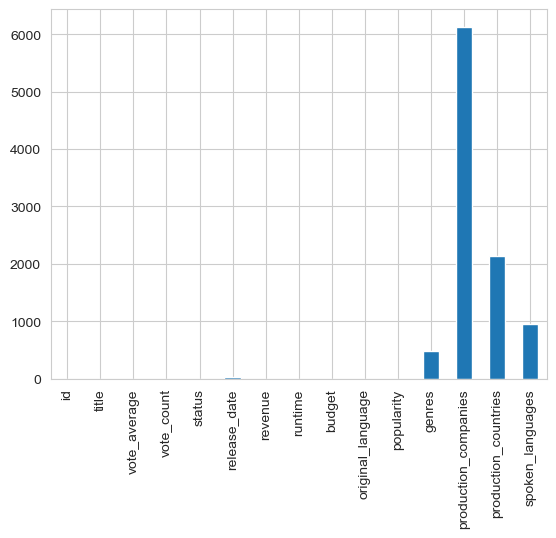

In [19]:
data.isna().sum().plot(kind='bar')

Text(0, 0.5, 'Number of movies')

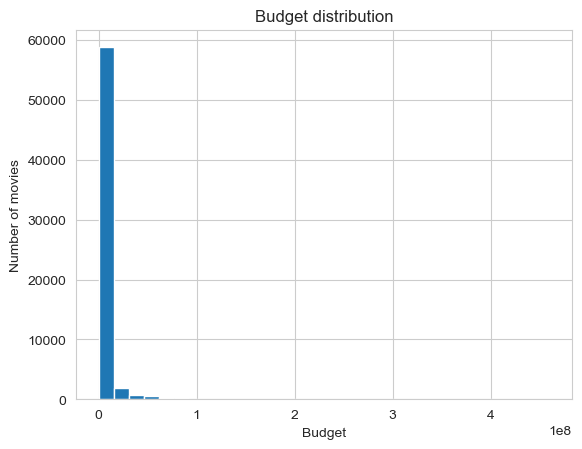

In [20]:
# First we will analyse numerical columns of the dataset using histograms
plt.figure()
data['budget'].hist(bins=30)
plt.title('Budget distribution')
plt.xlabel("Budget")
plt.ylabel("Number of movies")

In [21]:
print('The x axis represents the ranges of the budget while the y axis represents the number of movies')
print('It is evident that the distribution of the budget is highly right skewed and there is an existance of extreme cases')
print('The majority of the variables are near zero or have very low budget')
print('There are extreme outliers, with some movies having much larger budget than the majority')
print('Skewness and extreme values suggest that we might have to handle outliers when preprocessing')
print('The amount of movies with budget above 1e8 (100000000$) is:')
print((data['budget'] > 1e8).sum())

The x axis represents the ranges of the budget while the y axis represents the number of movies
It is evident that the distribution of the budget is highly right skewed and there is an existance of extreme cases
The majority of the variables are near zero or have very low budget
There are extreme outliers, with some movies having much larger budget than the majority
Skewness and extreme values suggest that we might have to handle outliers when preprocessing
The amount of movies with budget above 1e8 (100000000$) is:
453


In [22]:
# Second: Checking for duplicate rows
duplicates = data.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

# If any duplicate row is found, we are going to drop it
if duplicates > 0:
    data = data.drop_duplicates()
    print("Duplicates removed.")

Number of duplicate rows: 0


In [23]:
# Convert release_date to datetime, handling mixed formats
# dayfirst=True tells pandas that 15/07/2010 is 15th July, not invalid
data['release_date'] = pd.to_datetime(data['release_date'], format='mixed', dayfirst=True, errors='coerce')

# Extract Year and Month for analysis
data['release_year'] = data['release_date'].dt.year
data['release_month'] = data['release_date'].dt.month_name()

print("Dates converted. Null dates:", data['release_date'].isna().sum())
data.head(3)

Dates converted. Null dates: 27


,id,title,vote_average,vote_count,status,release_date,revenue,runtime,budget,original_language,popularity,genres,production_companies,production_countries,spoken_languages,release_year,release_month
0,27205,Inception,8.364,34495,Released,2010-07-15,825532764,148,160000000,en,83.952,"Action, Science Fiction, Adventure","Legendary Pictures, Syncopy, Warner Bros. Pict...","United Kingdom, United States of America","English, French, Japanese, Swahili",2010.0,July
1,157336,Interstellar,8.417,32571,Released,2014-11-05,701729206,169,165000000,en,140.241,"Adventure, Drama, Science Fiction","Legendary Pictures, Syncopy, Lynda Obst Produc...","United Kingdom, United States of America",English,2014.0,November
2,155,The Dark Knight,8.512,30619,Released,2008-07-16,1004558444,152,185000000,en,130.643,"Drama, Action, Crime, Thriller","DC Comics, Legendary Pictures, Syncopy, Isobel...","United Kingdom, United States of America","English, Mandarin",2008.0,July


In [24]:
# Summary statistics for numerical columns
numerical_stats = data.describe()

# Check specifically for "zero" values which might indicate missing info
zero_budget = (data['budget'] == 0).sum()
zero_revenue = (data['revenue'] == 0).sum()

print(f"Movies with 0 Budget: {zero_budget}")
print(f"Movies with 0 Revenue: {zero_revenue}")
display(numerical_stats)

Movies with 0 Budget: 49470
Movies with 0 Revenue: 50111


,id,vote_average,vote_count,release_date,revenue,runtime,budget,popularity,release_year
count,6.300000e+04,63000.000000,63000.000000,62973,6.300000e+04,63000.000000,6.300000e+04,63000.000000,62973.000000
mean,2.227146e+05,6.199308,326.487032,1998-03-25 13:36:18.247820544,1.116228e+07,92.712603,4.163998e+06,8.725862,1997.711400
min,2.000000e+00,1.179000,14.000000,1874-12-09 00:00:00,0.000000e+00,0.000000,0.000000e+00,0.600000,1874.000000
25%,3.560950e+04,5.600000,22.000000,1987-02-01 00:00:00,0.000000e+00,85.000000,0.000000e+00,2.849000,1987.000000
50%,8.975700e+04,6.300000,41.000000,2007-11-16 00:00:00,0.000000e+00,95.000000,0.000000e+00,4.957000,2007.000000
75%,3.765025e+05,6.900000,126.000000,2016-03-10 00:00:00,0.000000e+00,107.000000,0.000000e+00,9.278000,2016.000000
max,1.186774e+06,10.000000,34495.000000,2023-10-03 00:00:00,2.923706e+09,960.000000,4.600000e+08,2994.357000,2023.000000
std,2.521255e+05,0.992356,1315.334908,NaN,6.718081e+07,34.771182,1.768219e+07,29.559384,24.890506


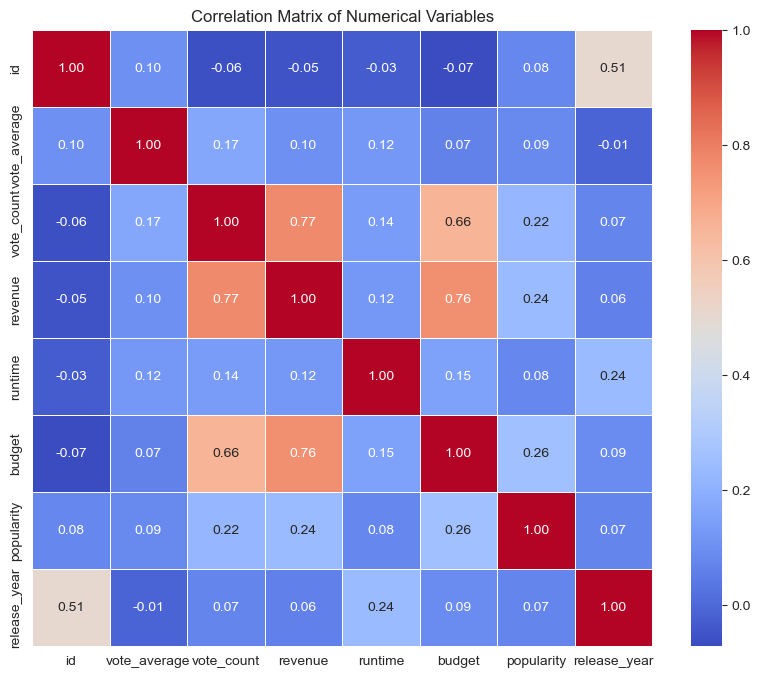

In [25]:
# Select only numerical columns for correlation
numeric_data = data.select_dtypes(include=[np.number])

# Compute correlation matrix
corr_matrix = numeric_data.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

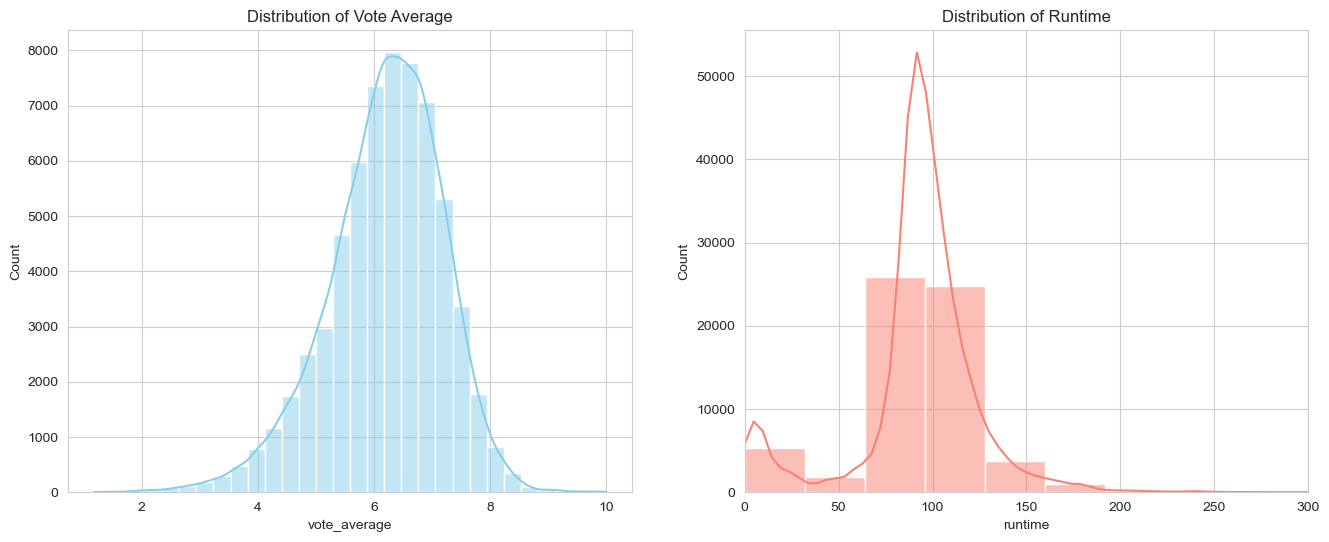

In [26]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Vote Average Distribution
sns.histplot(data['vote_average'], bins=30, kde=True, ax=axes[0], color='skyblue')
axes[0].set_title('Distribution of Vote Average')

# Runtime Distribution
sns.histplot(data['runtime'], bins=30, kde=True, ax=axes[1], color='salmon')
axes[1].set_title('Distribution of Runtime')
axes[1].set_xlim(0, 300) # Limiting to 300 mins to avoid extreme outliers distorting the view

plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_2248\3094621295.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.values, y=genre_counts.index, palette='viridis')


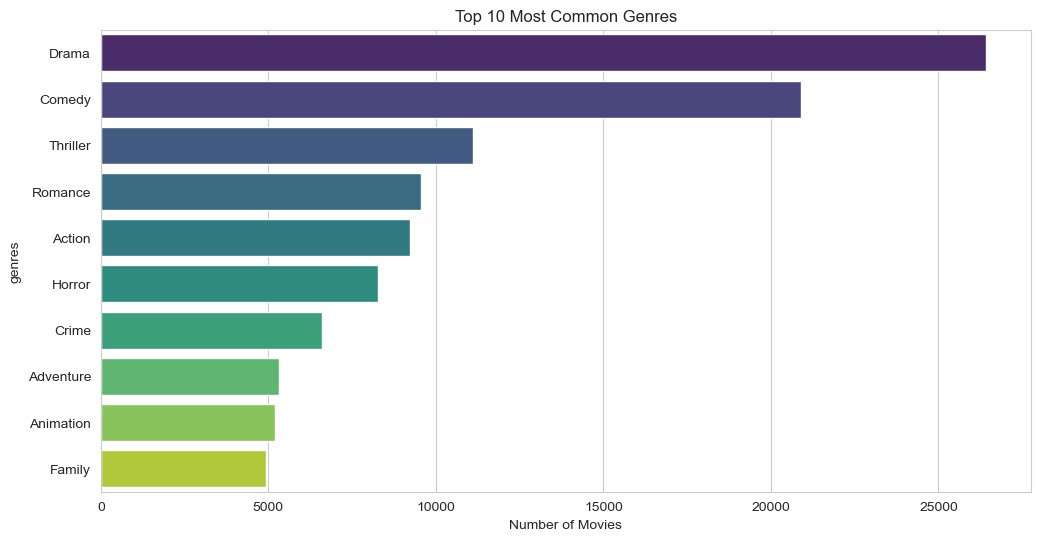

In [27]:
# Split the genres string by comma and explode them into separate rows
genres_exploded = data['genres'].str.split(', ').explode()

# Count the occurrences of each genre
genre_counts = genres_exploded.value_counts().head(10)

# Plot top 10 genres
plt.figure(figsize=(12, 6))
sns.barplot(x=genre_counts.values, y=genre_counts.index, palette='viridis')
plt.title('Top 10 Most Common Genres')
plt.xlabel('Number of Movies')
plt.show()

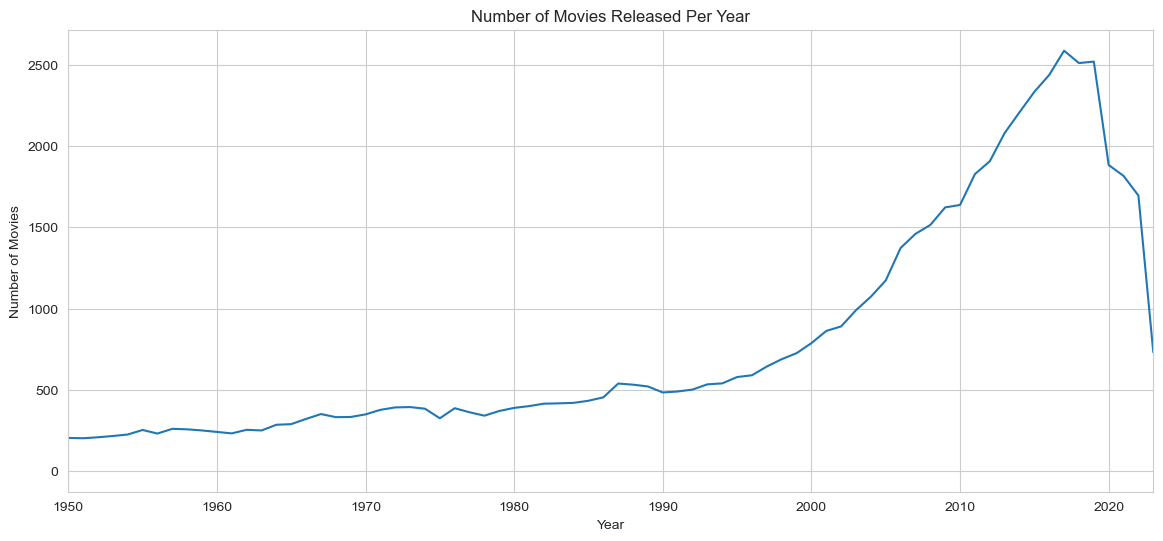

In [28]:
plt.figure(figsize=(14, 6))
# Count movies per year, sort by year
movies_per_year = data['release_year'].value_counts().sort_index()

# Plot line chart
sns.lineplot(x=movies_per_year.index, y=movies_per_year.values)
plt.title('Number of Movies Released Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.xlim(1950, 2023) # Focus on the modern era
plt.show()

C:\Users\user\AppData\Local\Temp\ipykernel_2248\976765247.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=lang_counts.index, y=lang_counts.values, palette='magma')


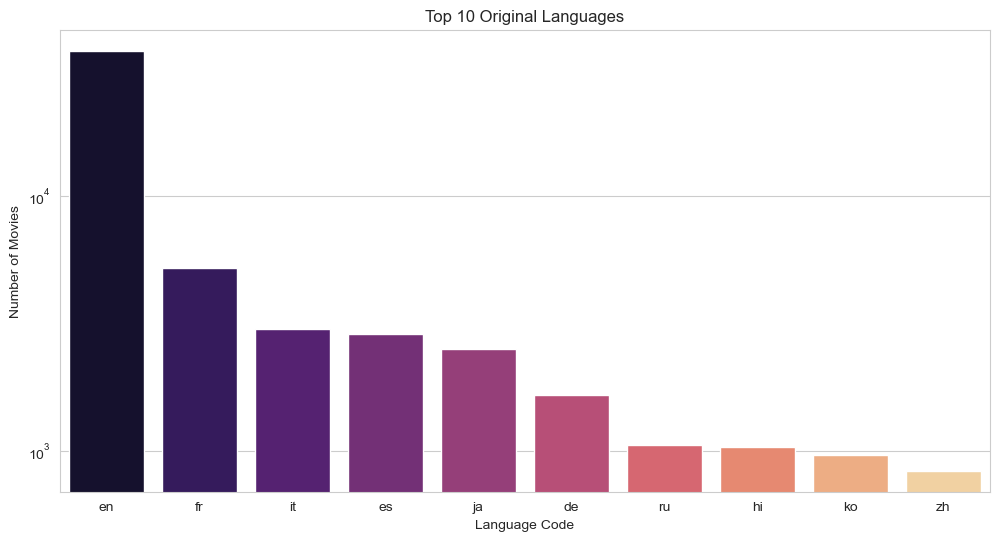

Percentage of movies in English: 58.70%


In [29]:
# Count movies by original language
lang_counts = data['original_language'].value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=lang_counts.index, y=lang_counts.values, palette='magma')
plt.title('Top 10 Original Languages')
plt.xlabel('Language Code')
plt.ylabel('Number of Movies')
plt.yscale('log') # Log scale helps visualize smaller categories against English
plt.show()

print(f"Percentage of movies in English: {(data['original_language'] == 'en').mean() * 100:.2f}%")

C:\Users\user\AppData\Local\Temp\ipykernel_2248\418862500.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_counts.values, y=country_counts.index, palette='Spectral')


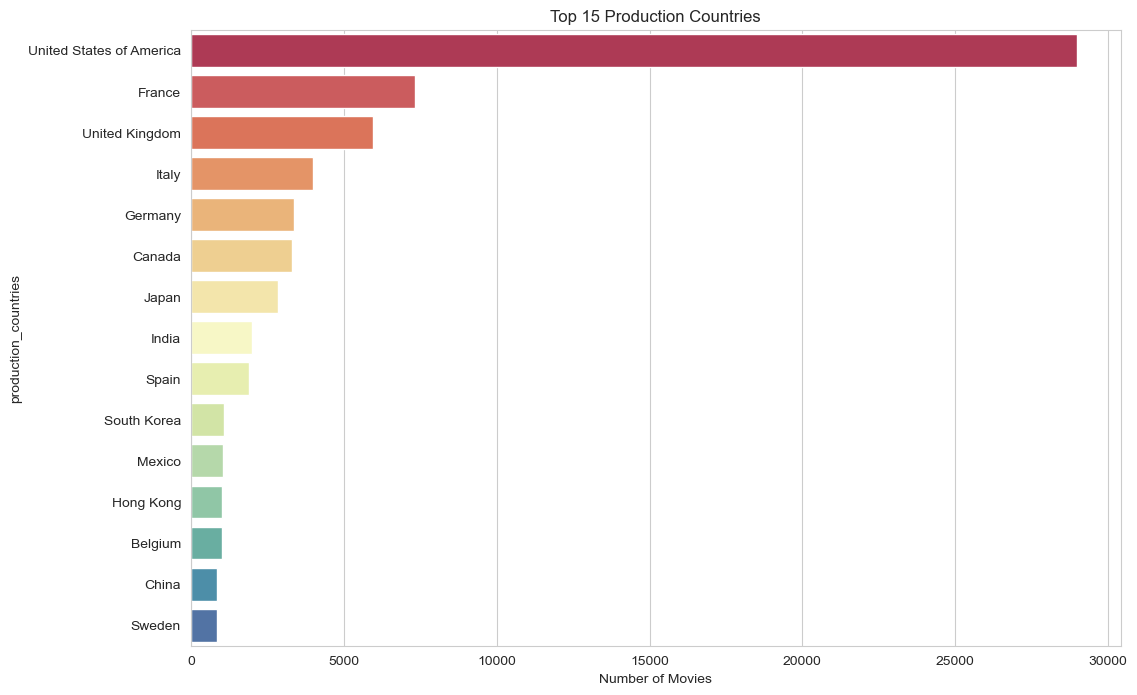

In [30]:
# Handle missing values in production_countries before splitting
countries_exploded = data['production_countries'].fillna('').str.split(', ').explode()

# Remove empty strings (caused by empty rows)
countries_exploded = countries_exploded[countries_exploded != '']

# Plot top 15 Countries
country_counts = countries_exploded.value_counts().head(15)

plt.figure(figsize=(12, 8))
sns.barplot(x=country_counts.values, y=country_counts.index, palette='Spectral')
plt.title('Top 15 Production Countries')
plt.xlabel('Number of Movies')
plt.show()

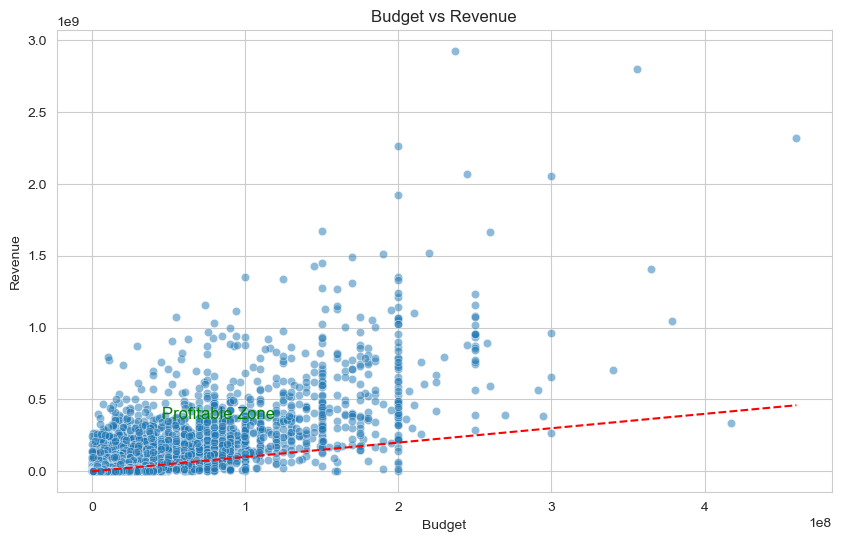

Top 5 Most Profitable Movies:
                            title     budget     revenue      profit
3                          Avatar  237000000  2923706026  2686706026
15              Avengers: Endgame  356000000  2800000000  2444000000
17                        Titanic  200000000  2264162353  2064162353
282      Avatar: The Way of Water  460000000  2320250281  1860250281
56   Star Wars: The Force Awakens  245000000  2068223624  1823223624


In [31]:
# Create a Profit column
data['profit'] = data['revenue'] - data['budget']

# Filter for movies that actually have financial data (budget & revenue > 0)
financials = data[(data['budget'] > 0) & (data['revenue'] > 0)]

# Plot correlation between Budget and Revenue
plt.figure(figsize=(10, 6))
sns.scatterplot(x='budget', y='revenue', data=financials, alpha=0.5)
plt.title('Budget vs Revenue')
plt.xlabel('Budget')
plt.ylabel('Revenue')

# Add a diagonal line (Break-even point)
plt.plot([0, financials['budget'].max()], [0, financials['budget'].max()], color='red', linestyle='--')
plt.text(financials['budget'].max()*0.1, financials['budget'].max()*0.8, 'Profitable Zone', fontsize=12, color='green')
plt.show()

print("Top 5 Most Profitable Movies:")
print(financials.nlargest(5, 'profit')[['title', 'budget', 'revenue', 'profit']])

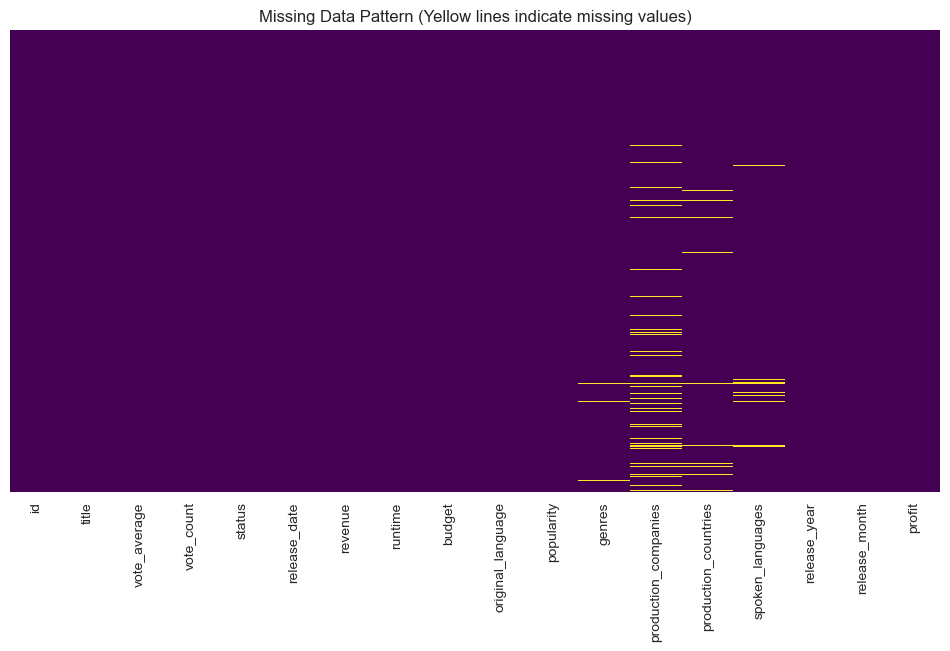

In [32]:
plt.figure(figsize=(12, 6))
# Heatmap of boolean values (True if missing, False if not)
sns.heatmap(data.isnull(), cbar=False, yticklabels=False, cmap='viridis')
plt.title('Missing Data Pattern (Yellow lines indicate missing values)')
plt.show()

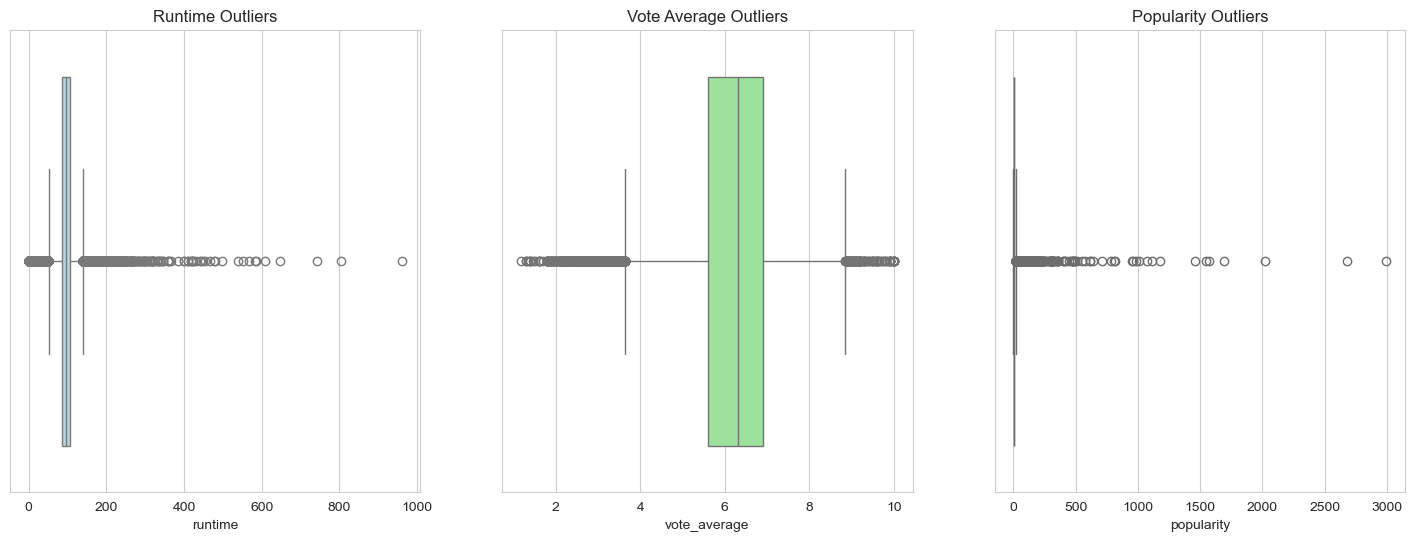

In [33]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Boxplot for Runtime
sns.boxplot(x=data['runtime'], ax=axes[0], color='lightblue')
axes[0].set_title('Runtime Outliers')

# Boxplot for Vote Average
sns.boxplot(x=data['vote_average'], ax=axes[1], color='lightgreen')
axes[1].set_title('Vote Average Outliers')

# Boxplot for Popularity
sns.boxplot(x=data['popularity'], ax=axes[2], color='salmon')
axes[2].set_title('Popularity Outliers')

plt.show()